The absolute error between the two ground energy dataset is 0.04524362 Hartrees.

The absolute relative error between the two ground energy dataset is 4.02%.


The bond length corresponding to the lowest ground state enery in this study is 0.750 angstrom 
.
The minimum ground state energy in this study is -1.13711707 Hartrees.


The bond length corresponding to the lowest ground state enery in Kolos et al. study is 0.701 angstrom 
.
The minimum ground state energy in Kolos et al. study is -1.17447482 Hartrees.




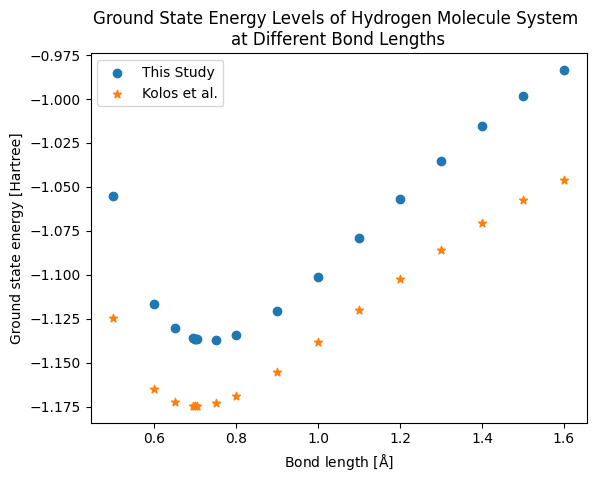

In [1]:
"""
- Project Goal: Generate the ground state energies of the Hydrogen molecule system
as the function of its bond length based on the Bravyi-Kiteav Transformation.
- Author: Yili Zhang, Jia Zhao
- Date: May 13, 2022
- References:
1. Quantum simulation of electronic structure  :   Cirq  :   google quantum ai. Google Quantum AI. (n.d.).
Retrieved May 13, 2022, from https://quantumai.google/cirq/tutorials/educators/chemistry
2. Kolos, W., & Wolniewicz, L. (1968). Improved theoretical ground‐state energy of the hydrogen molecule.
The Journal of Chemical Physics, 49(1), 404–410. https://doi.org/10.1063/1.1669836
"""


'''
Import libraries
'''
import numpy as np
from scipy.sparse import linalg

import cirq
import openfermion as of
import openfermionpyscf as ofpyscf
import matplotlib.pyplot as plt


'''
Initializations
'''
# Create a list of 17 bond lengths for the Hydrogen molecule
bond_lengths = np.array([1.0, 1.2, 1.3, 1.39, 1.4, 1.4011, 1.41, 1.5, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2])/2

# Calculate the mean ground energies in the Kolos et al. paper
enery_Kolos_upper = np.array([-1.12453881, -1.16493435, - 1.17234623, -1.17445199, -1.17447477, -1.17447498, -1.17446041 , -1.17285408, -1.16858212, -1.15506752, -1.13813155, -1.12013035, -1.10242011, -1.08578740, -1.07067758, -1.05731738, -1.04578647])

enery_Kolos_lower = np.array([-1.12453864, -1.16493411, -1.17234596, -1.17445199, -1.17447477, -1.17447466, -1.17446041 , -1.17285370, -1.16858164, -1.15506694, - 1.13813078, -1.12012903, -1.10241799, -1.08578400, -1.07067254, -1.05730948, -1.04577476])

enery_Kolos_mean = enery_Kolos_upper + enery_Kolos_lower
enery_Kolos_mean = enery_Kolos_mean/2

# Create an empty array to store the ground state energies
# simulated at different bond lengths
energy = []


'''
Simulate the ground state energy of the Hydrogen molecule at each bond length
'''
for bond_length in bond_lengths:

	# Set molecule parameters
	geometry = [('H', (0.0, 0.0, 0.0)), ('H', (0.0, 0.0, bond_length))]
	basis = 'sto-3g'
	multiplicity = 1
	charge = 0

	# Perform electronic structure calculations and
	# obtain Hamiltonian as an InteractionOperator
	hamiltonian = ofpyscf.generate_molecular_hamiltonian(
	    geometry, basis, multiplicity, charge)
    
	# Convert to a FermionOperator
	hamiltonian_ferm_op = of.get_fermion_operator(hamiltonian)

	# Map to QubitOperator using the BKT
	hamiltonian_bk = of.bravyi_kitaev(hamiltonian_ferm_op)

	# Convert to Scipy sparse matrix
	hamiltonian_bk_sparse = of.get_sparse_operator(hamiltonian_bk)

	# Compute ground energy
	eigs, _ = linalg.eigsh(hamiltonian_bk_sparse, k=1, which='SA')
	ground_energy = eigs[0]

	# Store the ground state energy at each bond length in the energy array
	if bond_length == bond_lengths[0]:
		energy = np.array(ground_energy)
	else:
		energy = np.append(energy, ground_energy)


'''
Quantitative analysis
'''
# The average absolute difference between two energy curves
abs_diff = np.average(np.abs(energy - enery_Kolos_mean))
print("The absolute error between the two ground energy "
	  "dataset is {0:0.8f} Hartrees.\n".format(abs_diff))

# The average absolute relative differnce between two energy curves
rel_diff = np.average(np.abs(np.divide((energy - enery_Kolos_mean), enery_Kolos_mean)))
print("The absolute relative error between the two ground "
	  "energy dataset is {0:0.2f}%.\n\n".format(rel_diff*100))

# The bond length corresponding to the lowest ground state enery in this study
bond_lengths_min = bond_lengths[np.argmin(energy)]
print("The bond length corresponding to the lowest ground state "
	  "enery in this study is {0:0.3f} angstrom \n.".format(bond_lengths_min))
# The mimimum energy
print("The minimum ground state energy in this study is "
	  "{0:0.8f} Hartrees.\n\n".format(np.amin(energy)))

# The bond length corresponding to the lowest ground state enery in Kolos et al. study
bond_lengths_min_Kolos = bond_lengths[np.argmin(enery_Kolos_mean)]
print("The bond length corresponding to the lowest ground state "
	  "enery in Kolos et al. study is {0:0.3f} angstrom \n.".format(bond_lengths_min_Kolos))
# The mimimum energy
print("The minimum ground state energy in Kolos et al. study is "
	  "{0:0.8f} Hartrees.\n\n".format(np.amin(enery_Kolos_mean)))


'''
Generate the plot of ground state energy of the Hydrogen molecule
as the function of the 17 bond lengths
'''
# Plot the energy curve from this study
plt.scatter(bond_lengths, energy, marker = "o", label = "This Study")

# Plot the energy curve with the data from Kolos et al. paper
plt.scatter(bond_lengths, enery_Kolos_mean, marker = "*", label = "Kolos et al.")

# Add labels, title and legend on the plot
plt.xlabel('Bond length [$\mathrm{\AA}$]')
plt.ylabel('Ground state energy [Hartree]')
plt.title('Ground State Energy Levels of Hydrogen Molecule System \nat Different Bond Lengths')
plt.legend()

# Save an show the plot
plt.show()

In [2]:
# Set molecule parameters
geometry = [('H', (0.0, 0.0, 0.0)), ('H', (0.0, 0.0, 0.74))]
basis = 'sto-3g'
multiplicity = 1
charge = 0

# Perform electronic structure calculations and
# obtain Hamiltonian as an InteractionOperator
hamiltonian = ofpyscf.generate_molecular_hamiltonian(
    geometry, basis, multiplicity, charge)

# Convert to a FermionOperator
hamiltonian_ferm_op = of.get_fermion_operator(hamiltonian)


In [16]:
print(hamiltonian)


() 0.7151043390810812
((0, 1), (0, 0)) -1.2533097866459775
((1, 1), (1, 0)) -1.2533097866459775
((2, 1), (2, 0)) -0.4750688487721778
((3, 1), (3, 0)) -0.4750688487721778
((0, 1), (0, 1), (0, 0), (0, 0)) 0.33737796340722415
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09060523100759853
((0, 1), (1, 1), (1, 0), (0, 0)) 0.33737796340722415
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09060523100759853
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09060523100759853
((0, 1), (2, 1), (2, 0), (0, 0)) 0.33185570067540676
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09060523100759853
((0, 1), (3, 1), (3, 0), (0, 0)) 0.33185570067540676
((1, 1), (0, 1), (0, 0), (1, 0)) 0.33737796340722415
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09060523100759853
((1, 1), (1, 1), (1, 0), (1, 0)) 0.33737796340722415
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09060523100759853
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09060523100759853
((1, 1), (2, 1), (2, 0), (1, 0)) 0.33185570067540676
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09060523100759853
((1, 1), (3, 1), (3, 0), (1, 0)) 0.

In [29]:
print(hamiltonian_ferm_op)

0.7151043390810812 [] +
-1.2533097866459775 [0^ 0] +
0.33737796340722415 [0^ 0^ 0 0] +
0.09060523100759853 [0^ 0^ 2 2] +
0.33737796340722415 [0^ 1^ 1 0] +
0.09060523100759853 [0^ 1^ 3 2] +
0.09060523100759853 [0^ 2^ 0 2] +
0.33185570067540676 [0^ 2^ 2 0] +
0.09060523100759853 [0^ 3^ 1 2] +
0.33185570067540676 [0^ 3^ 3 0] +
0.33737796340722415 [1^ 0^ 0 1] +
0.09060523100759853 [1^ 0^ 2 3] +
-1.2533097866459775 [1^ 1] +
0.33737796340722415 [1^ 1^ 1 1] +
0.09060523100759853 [1^ 1^ 3 3] +
0.09060523100759853 [1^ 2^ 0 3] +
0.33185570067540676 [1^ 2^ 2 1] +
0.09060523100759853 [1^ 3^ 1 3] +
0.33185570067540676 [1^ 3^ 3 1] +
0.33185570067540676 [2^ 0^ 0 2] +
0.09060523100759853 [2^ 0^ 2 0] +
0.33185570067540676 [2^ 1^ 1 2] +
0.09060523100759853 [2^ 1^ 3 0] +
-0.4750688487721778 [2^ 2] +
0.09060523100759853 [2^ 2^ 0 0] +
0.34882575224523144 [2^ 2^ 2 2] +
0.09060523100759853 [2^ 3^ 1 0] +
0.34882575224523144 [2^ 3^ 3 2] +
0.33185570067540676 [3^ 0^ 0 3] +
0.09060523100759853 [3^ 0^ 2 1] +
0.331

In [9]:
hamiltonian_sparse = of.get_sparse_operator(hamiltonian)
print(hamiltonian_sparse)

  (0, 0)	(0.7151043390810812+0j)
  (1, 1)	(0.24003549030890337+0j)
  (2, 2)	(0.24003549030890337+0j)
  (3, 3)	(0.4626181460271884+0j)
  (12, 3)	(0.18121046201519705+0j)
  (4, 4)	(-0.5382054475648963+0j)
  (5, 5)	(-0.5307733570014573+0j)
  (6, 6)	(-0.3495628949862604+0j)
  (9, 6)	(-0.18121046201519705+0j)
  (7, 7)	(0.3555207000676414+0j)
  (8, 8)	(-0.5382054475648963+0j)
  (6, 9)	(-0.18121046201519705+0j)
  (9, 9)	(-0.3495628949862604+0j)
  (10, 10)	(-0.5307733570014573+0j)
  (11, 11)	(0.3555207000676414+0j)
  (3, 12)	(0.18121046201519705+0j)
  (12, 12)	(-1.1167593073964253+0j)
  (13, 13)	(-0.44561581548217294+0j)
  (14, 14)	(-0.44561581548217294+0j)
  (15, 15)	(0.923179180922542+0j)


In [18]:
eigs, _ = linalg.eigsh(hamiltonian_sparse, k=14, which='SA')
ground_energy = eigs[0]
print(ground_energy)
print(eigs)

-1.137283834488501
[-1.13728383  0.48314267  0.3555207   0.24003549 -0.16835243  0.3555207
  0.24003549 -0.53077336 -0.44561582 -0.44561582 -0.53077336 -0.53820545
 -0.53820545 -0.53077336]
